# Importing packages

## Setup

In [1]:
%reload_ext autoreload
%autoreload 2

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import open3d
import pptk
from logging import raiseExceptions
import seaborn as sns
import funcs
import tensorflow as tf

%reload_ext funcs


Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.


## Data loader

In [2]:
# def toSpherical(df):

#     theta = np.arctan2(np.sqrt(df['-X']**2 + df['Y']**2), df['Z'])

#     phi = np.arctan2(df['Y'],  df['-X'])

#     r = np.sqrt(df['-X']**2 + df['Y']**2 + df['Z']**2)

#     return (r, theta, phi)

# def toCartesian(df):
#     x = self.r*np.cos(self.phi)*sin(self.theta)
#     y = self.r*np.sin(self.phi)*sin(self.theta)
#     z = self.r*np.cos(self.theta)
#     return Pt(x,y,z)

In [2]:
dataloader = funcs.DataLoader(modality='Radar')
data = dataloader.get_data(filename='1_.txt')

data.full

,Range,Azimuth,Elevation,Amplitude,RCS,Velocity
0,0.001,0.172222,0.8,0.18606,0.853931,0.500
1,0.001,0.300000,0.1,0.00143,0.431067,0.755
2,0.001,0.305556,0.1,0.00118,0.414376,0.755
3,0.001,0.311111,0.4,0.00103,0.402567,0.755
4,0.001,0.313889,0.4,0.00106,0.405061,0.755
...,...,...,...,...,...,...
1061,0.497,0.261111,0.6,0.01537,0.637335,0.500
1062,0.498,0.244444,0.4,0.01299,0.622722,0.500
1063,0.499,0.258333,0.8,0.01335,0.625096,0.500
1064,0.507,0.102778,0.7,0.01300,0.622789,0.810


## <span style="color:orange; font-size:0.8em"> Viewing the point clouds </span>

In [3]:
# Example 1:

x = '6'
data = funcs.DataLoader(modality='Lidar').get_data(filename=x+'_.txt')
points_lidar = data.train[data.train.columns[:3]].to_numpy()

dataloader = funcs.DataLoader(modality='Radar')
data = dataloader.get_data(filename='1_.txt')
points_radar = dataloader.dataframe_original[['-X','Y','Z']].values


pcdL = open3d.geometry.PointCloud()
pcdL.points = open3d.utility.Vector3dVector(points_lidar)

pcdR = open3d.geometry.PointCloud()
pcdR.points = open3d.utility.Vector3dVector(points_radar)

# pcd.colors = open3d.utility.Vector3dVector(data[data.columns[3]].to_numpy())
open3d.visualization.draw_geometries([pcdL])

# open3d.visualization.draw_geometries([pcdR])

In [5]:
# # points_radar
# plt.subplot(121)
# funcs.DataLoader().visualize(points=points_lidar , method='open3d')

# plt.subplot(122)
# funcs.DataLoader().visualize(points=points_radar , method='open3d')


# points_lidar
# Example 2:
# funcs.DataLoader().visualize(run_demo=True, modality='Radar', filename='2_.txt')

## <span style="color:orange; font-size:0.8em"> Vector Input </span>

In [129]:
# vector_input = funcs.VectorInput(filename='1_.txt', modality='Radar', normalize=True)

# vector_input.prediction

In [217]:
dataloader = funcs.DataLoader(modality='Radar')
dataloader.get_data(filename='1_.txt')

print('original dataframe size', dataloader.dataframe_original.shape)
print(' dataframe', dataloader.dataframe.shape)
print(' dataframe2', dataloader.dataframe2.shape)

dataloader.dataframe.shape

original dataframe size (1066, 18)
 dataframe (1066, 4)
 dataframe2 (688, 4)


(1066, 4)

In [210]:
# dataloader.dataframe[['Azimuth', 'Elevation', 'Range']].to_numpy()

In [220]:
# Example 1:

points_orig = dataloader.dataframe[['Azimuth', 'Elevation', 'Range']].to_numpy()

points_after = dataloader.dataframe2[['Azimuth', 'Elevation', 'Range']].to_numpy()


pcd = open3d.geometry.PointCloud()
pcd.points = open3d.utility.Vector3dVector(points_orig)

pcd2 = open3d.geometry.PointCloud()
pcd2.points = open3d.utility.Vector3dVector(points_after)

# use open3d to compare pcd and pcd2 point clouds 
open3d.visualization.draw_geometries([pcd])


In [221]:
# use open3d.visualization to plot two point clouds

In [219]:
open3d.visualization.draw_geometries([pcd2])

In [145]:
dataloader = funcs.DataLoader(modality='Lidar')
dataloader.get_data(filename='1_.txt')

dataloader.dataframe.head(3)

,Range,Azimuth,Elevation,RCS
0,173,134.0,2,18
1,165,130.0,2,18
2,173,134.0,1,13


In [25]:
# vector_input.view()
vector_input.dataframe

import tensorflow as tf 

# tensorflow dataset from dataframe
dataset = tf.data.Dataset.from_tensor_slices(vector_input.dataframe)

# normalize the data in each column to 0-1
dataset = dataset.map(lambda x: (x - tf.math.reduce_min(x)) / (tf.math.reduce_max(x) - tf.math.reduce_min(x)))


# view the values in dataset
for x in dataset.take(1):
    print(x)

tf.Tensor([0.         0.20074569 0.9367698  0.21696949 1.         0.58504146], shape=(6,), dtype=float64)


In [15]:
# view the values in dataset
for x in dataset.take(1):
    print(x)

tf.Tensor([0.         0.20074569 0.9367698  0.21696949 1.         0.58504146], shape=(6,), dtype=float64)


In [5]:
vector_input.data.train

,Range,Azimuth,Elevation,Amplitude,RCS,Velocity
31,0.001,0.936111,0.5,0.22173,0.869165,0.500
807,0.182,0.836111,0.6,0.01533,0.637108,0.410
413,0.025,0.547222,0.2,0.00461,0.532740,0.655
1025,0.319,0.550000,0.6,0.02098,0.664361,0.500
798,0.180,0.813889,0.8,0.03205,0.701166,0.775
...,...,...,...,...,...,...
868,0.206,0.869444,0.3,0.02543,0.681069,0.225
908,0.228,0.813889,0.7,0.08697,0.787874,0.500
50,0.002,0.191667,0.1,0.02744,0.687677,0.500
353,0.019,0.533333,0.8,0.00621,0.558618,0.420


## <span style="color:orange; font-size:0.8em"> Matrix Input </span>

In [6]:
matrix_input = funcs.MatrixInput(dataset_directory='/home/artin/Documents/10dB_CR_10deg_in_2021-10-15-14-15-49' , modality='Radar')

matrix_input.data.full.shape

(180, 20)

In [20]:
matrix_input.data.full.sum()

57787.0

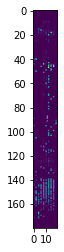

In [8]:
plt.imshow(matrix_input.data.full)
plt.show()